<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/Exploratory_data_analysis_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis - 2

#### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.ensemble import IsolationForest


In [ ]:
df=pd.read_csv(r'/content/adult_with_headers.csv')
df.shape

(32561, 15)

Our dataset contains 32561 rows and 15 columns.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Exploration and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have eight categorial value and seven numerical values.

In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df[["occupation","workclass","native_country"]]=df[["occupation","workclass","native_country"]].replace({" ?":"unknown"})

In [ ]:
df.duplicated().sum()

24

we have 24 duplicated rows, these should be dropped.

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(32537, 15)

After dropping duplicates we have 32537 rows.

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


Dataset does not have any missing values.

In [ ]:
# Define the numerical columns
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [ ]:
for col in num_cols:
    print(f"summary of {col}")
    print(df[col].agg(["min","max",'mean',"median","skew"]))
    print("-"*50)

summary of age
min       17.000000
max       90.000000
mean      38.585549
median    37.000000
skew       0.557663
Name: age, dtype: float64
--------------------------------------------------
summary of fnlwgt
min       1.228500e+04
max       1.484705e+06
mean      1.897808e+05
median    1.783560e+05
skew      1.447703e+00
Name: fnlwgt, dtype: float64
--------------------------------------------------
summary of education_num
min        1.000000
max       16.000000
mean      10.081815
median    10.000000
skew      -0.309500
Name: education_num, dtype: float64
--------------------------------------------------
summary of capital_gain
min           0.000000
max       99999.000000
mean       1078.443741
median        0.000000
skew         11.949403
Name: capital_gain, dtype: float64
--------------------------------------------------
summary of capital_loss
min          0.000000
max       4356.000000
mean        87.368227
median       0.000000
skew         4.592702
Name: capital_loss, dtyp

- Observations                 
1)Age almost have same mean and median.            
2)education_num and hours_per_week also have almost same mean and median with light skewedness.                  

So for these i am applying standard scaling. And for remaining columns lets apply min-max scaler as they have very wide range.

#### Standard Scaling

StandardScaler is preferred when features have varying scales and we want to standardize them to have a mean of 0 and a standard deviation of 1. It helps to remove bias from features with larger ranges and ensures equal weight for each feature in the model. Best used when the data is normally distributed or close to it.

In [ ]:
scaler=StandardScaler()
df[["Age","education_num","hours_per_week"]]=scaler.fit_transform(df[["age","education_num","hours_per_week"]])
df[["Age","education_num","hours_per_week"]]


,Age,education_num,hours_per_week
0,0.030390,1.134777,-0.035664
1,0.836973,1.134777,-2.222483
2,-0.042936,-0.420679,-0.035664
3,1.056950,-1.198407,-0.035664
4,-0.776193,1.134777,-0.035664
...,...,...,...
32532,-0.849519,0.745913,-0.197650
32533,0.103716,-0.420679,-0.035664
32534,1.423579,-0.420679,-0.035664
32535,-1.216148,-0.420679,-1.655530


#### Min-MAX Scaling

Min-Max Scaling is ideal when features need to be scaled to a specific range, typically [0, 1].This method ensures all features contribute equally, regardless of their original scale. It's particularly useful when the features have outliers or widely varying ranges.

In [ ]:
min_max=MinMaxScaler()
df[["fnlwgt","capital_gain","capital_loss"]]=min_max.fit_transform(df[["fnlwgt","capital_gain","capital_loss"]])
df[["fnlwgt","capital_gain","capital_loss"]]


,fnlwgt,capital_gain,capital_loss
0,0.044302,0.021740,0.0
1,0.048238,0.000000,0.0
2,0.138113,0.000000,0.0
3,0.151068,0.000000,0.0
4,0.221488,0.000000,0.0
...,...,...,...
32532,0.166404,0.000000,0.0
32533,0.096500,0.000000,0.0
32534,0.094827,0.000000,0.0
32535,0.128499,0.000000,0.0


**Standard Scaling**

**Preferred when:**
1. Features have varying scales and a normal or near-normal distribution.
2.  Algorithms sensitive to feature scales (e.g., k-NN, k-means, SVM, linear regression, logistic regression).
Why: Standardizes features to have zero mean and unit variance.  Removes bias from features with larger ranges, ensuring each feature contributes equally.
Example in code:  Scaling 'age', 'education_num', 'hours_per_week'


**Min-Max Scaling**

**Preferred when:**
1. Features need to be scaled to a specific range, usually [0,1].
2. Algorithms benefit from features within a bounded range (e.g., neural networks, some distance-based algorithms).
3. Preserving the original distribution of the data is crucial.
Why: Scales features to a specific range. Useful when dealing with outliers or widely varying ranges.  It helps ensure that all features contribute equally.
Example in Code: Scaling 'fnlwgt', 'capital_gain', 'capital_loss'

#### Encoding Techniques

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [ ]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print("-"*50)

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
unknown               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------
education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
--------------------------------------------------
marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418


Apply OneHotEncoding for columns having less than 5 unique vaules, remaining columns are labelencoded.

#### OneHotEncoding

In [ ]:
# Initialize OneHotEncoder with drop='first' to avoid multicollinearity and sparse_output=False to get a DataFrame
one_hot = OneHotEncoder(drop='first', handle_unknown='ignore')  # sparse_output=False to get a DataFrame instead of sparse matrix

# Fit and transform using the specified columns
one_hot_encoder = one_hot.fit_transform(df[["relationship", "sex", "income"]]).toarray()

# Get feature names using the original column names as a list of strings
encoded_columns = one_hot.get_feature_names_out(["relationship", "sex", "income"])

# Convert the result into a DataFrame using the obtained feature names
encoded_workclass_df = pd.DataFrame(one_hot_encoder, columns=encoded_columns)
encoded_workclass_df.head()

,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income_ >50K
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### LabelEncoding

In [ ]:

# Apply Label Encoding to remaining categorical columns
label_encoder = LabelEncoder()
for col in cat_cols:
    if col not in ["relationship", "sex", "income"]:
        df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df_1=pd.concat([df,encoded_workclass_df],axis=1)
df_1.drop(["relationship", "sex", "income"],axis=1,inplace=True)
df_1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week,native_country,Age,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income_ >50K
0,39,6,0.044302,9,1.134777,4,0,4,0.02174,0.0,-0.035664,38,0.030390,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,5,0.048238,9,1.134777,2,3,4,0.00000,0.0,-2.222483,38,0.836973,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,3,0.138113,11,-0.420679,0,5,4,0.00000,0.0,-0.035664,38,-0.042936,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,3,0.151068,1,-1.198407,2,5,2,0.00000,0.0,-0.035664,38,1.056950,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,3,0.221488,9,1.134777,2,9,2,0.00000,0.0,-0.035664,4,-0.776193,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_1.drop_duplicates(inplace=True)
df_1.shape

(32537, 20)

So, Our encoded dataset have 20 columns.


**One-Hot Encoding**

**Pros:**

*   **Avoids ordinality assumptions:** One-hot encoding treats each category as independent, preventing the model from assuming an order or ranking between them. This is crucial when categories are nominal (e.g., colors, countries).
*   **Interpretability:**  The resulting binary features are easy to interpret. A '1' indicates the presence of a category, and '0' its absence.
*   **Works well with most algorithms:**  Many machine learning algorithms perform well with one-hot encoded data, including linear models, decision trees, and support vector machines.

**Cons:**

*   **High dimensionality:**  Creates a large number of new features, one for each category. This can lead to increased computational cost and potential overfitting, especially with a high number of categories or a small dataset.
*   **Multicollinearity:**  The one-hot encoded columns are perfectly correlated (if one is '1' the rest are '0' for that row). This can cause issues with some algorithms, like linear regression.  Using `drop='first'` in `OneHotEncoder` helps mitigate this.
*   **Sparse data:** The resulting dataset can become very sparse, with mostly zeros.



**Label Encoding**

**Pros:**

*   **Dimensionality reduction:**  Reduces the number of features compared to one-hot encoding. It converts categories into numerical labels.
*   **Simplicity:** Easier to implement than one-hot encoding.
*   **Suitable for ordinal data:**  If the categories have a natural order or ranking (e.g., low, medium, high), label encoding preserves this information.

**Cons:**

*   **Introduces ordinality:** Implies an order between categories, which can mislead the model when categories are nominal.  The model might interpret '1' as being greater than '0' when there is no actual relationship.
*   **Not suitable for all algorithms:** Some algorithms (e.g., linear regression) might misinterpret the encoded numerical values as having meaningful quantitative differences.
*   **Less interpretable:** The numerical labels don't have direct meaning compared to the binary features created by one-hot encoding.







#### Feature Engineering

In [ ]:
# Create new features

# 1. Total Capital: Combine capital gain and capital loss
df_1['total_capital'] = df_1['capital_gain'] - df_1['capital_loss']

# 2. Income-Hours Ratio
df_1['income_hours_ratio'] = df_1['hours_per_week'] / (df_1['Age'] + 1) #Adding 1 to avoid division by zero

df_1.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,...,Age,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income_ >50K,total_capital,income_hours_ratio
0,39,6,0.044302,9,1.134777,4,0,4,0.02174,0.0,...,0.030390,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.02174,-0.034612
1,50,5,0.048238,9,1.134777,2,3,4,0.00000,0.0,...,0.836973,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,-1.209861
2,38,3,0.138113,11,-0.420679,0,5,4,0.00000,0.0,...,-0.042936,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,-0.037264
3,53,3,0.151068,1,-1.198407,2,5,2,0.00000,0.0,...,1.056950,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,-0.017338
4,28,3,0.221488,9,1.134777,2,9,2,0.00000,0.0,...,-0.776193,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,-0.159351


**total_captial:**  Capital gain and loss are likely related and their combined effect might be a stronger predictor.

**income_hours_ratio:**  People with more hours per week relative to their age might have different income patterns.

#### Log transformation for a skewed numerical feature

In [ ]:
#Check for skewness
print(f"Skewness of fnlwgt before transformation: {df_1['fnlwgt'].skew()}")

# Apply log transformation (add 1 to handle zero values)
df_1['fnlwgt_log'] = np.log1p(df_1['fnlwgt'])

# Check skewness again
print(f"Skewness of fnlwgt after transformation: {df_1['fnlwgt_log'].skew()}")



Skewness of fnlwgt before transformation: 1.447702908349535
Skewness of fnlwgt after transformation: 1.0168372448632763


Apply log transformation to the 'fnlwgt' (final weight) feature.The log transformation helps to reduce the influence of extreme values and makes the distribution more symmetric if it is highly skewed.

#### Feature Selection

#### Isolation Forest

In [ ]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Adjust contamination as needed

# Fit and predict outliers
outlier_labels = iso_forest.fit_predict(df_1.select_dtypes(include=["float64", "int64"]))

# Add a column to indicate outliers
df_1["Outlier"] = outlier_labels
df_1



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income_ >50K,total_capital,income_hours_ratio,fnlwgt_log,Outlier
0,39,6,0.044302,9,1.134777,4,0,4,0.021740,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.021740,-0.034612,0.043349,1
1,50,5,0.048238,9,1.134777,2,3,4,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-1.209861,0.047110,1
2,38,3,0.138113,11,-0.420679,0,5,4,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.037264,0.129372,1
3,53,3,0.151068,1,-1.198407,2,5,2,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.017338,0.140690,1
4,28,3,0.221488,9,1.134777,2,9,2,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,-0.159351,0.200070,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,3,0.166404,7,0.745913,2,12,4,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,-1.313458,0.153926,1
32533,40,3,0.096500,11,-0.420679,2,6,4,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,-0.032312,0.092124,1
32534,58,3,0.094827,11,-0.420679,6,0,4,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,-0.014715,0.090596,1
32535,22,3,0.128499,11,-0.420679,4,0,4,0.000000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,7.659249,0.120889,1


-1 indicates outliers and +1 indicates inliers.


In [ ]:
# Remove outliers
df_1 = df_1[df_1["Outlier"] == 1]  # Keep only inliers
df_1.drop("Outlier", axis=1, inplace=True)

print(f"Number of rows after removing outliers: {df_1.shape[0]}")


Number of rows after removing outliers: 30910


<ipython-input-30-22cd5aa6f930>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop("Outlier", axis=1, inplace=True)


**How Outliers Can Affect Model Performance:**                                 
Skewed Metrics: Outliers can inflate or deflate metrics like mean, standard deviation, and RMSE.       
Biased Predictions: Algorithms that minimize loss (e.g., Linear Regression, Ridge) can overfit to outliers.                        
Poor Generalization: Models may become less robust to unseen data due to the undue influence of extreme values.                           
Misleading Patterns: Outliers can mask true relationships between features and targets             

In [ ]:
df_1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income_ >50K,total_capital,income_hours_ratio,fnlwgt_log
0,39,6,0.044302,9,1.134777,4,0,4,0.02174,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.02174,-0.034612,0.043349
1,50,5,0.048238,9,1.134777,2,3,4,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,-1.209861,0.047110
2,38,3,0.138113,11,-0.420679,0,5,4,0.00000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,-0.037264,0.129372
3,53,3,0.151068,1,-1.198407,2,5,2,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,-0.017338,0.140690
5,37,3,0.184932,12,1.523641,2,3,4,0.00000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,-0.040356,0.169685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,22,3,0.202298,15,-0.031815,4,10,4,0.00000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.164997,0.184234
32532,27,3,0.166404,7,0.745913,2,12,4,0.00000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,-1.313458,0.153926
32533,40,3,0.096500,11,-0.420679,2,6,4,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,-0.032312,0.092124
32534,58,3,0.094827,11,-0.420679,6,0,4,0.00000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,-0.014715,0.090596


#### Predictive power score

In [ ]:
!pip install --upgrade numpy==1.24

In [ ]:
!pip install ppscore

In [ ]:
import ppscore as pps

# Compute the Predictive Power Score matrix
pps_matrix = pps.matrix(df_1)

# Show a sample of PPS relationships
print(pps_matrix[["x", "y", "ppscore"]].sort_values(by="ppscore", ascending=False))




                 x                             y  ppscore
0              age                           age      1.0
24       workclass                     workclass      1.0
72       education                     education      1.0
95   education_num                     education      1.0
96   education_num                 education_num      1.0
..             ...                           ...      ...
199   capital_gain       relationship_ Own-child      0.0
198   capital_gain  relationship_ Other-relative      0.0
197   capital_gain   relationship_ Not-in-family      0.0
195   capital_gain                native_country      0.0
277            Age                     workclass      0.0

[529 rows x 3 columns]


<ipython-input-35-5b9046f90b98>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), annot=True, cmap="coolwarm",fmt=".2f")


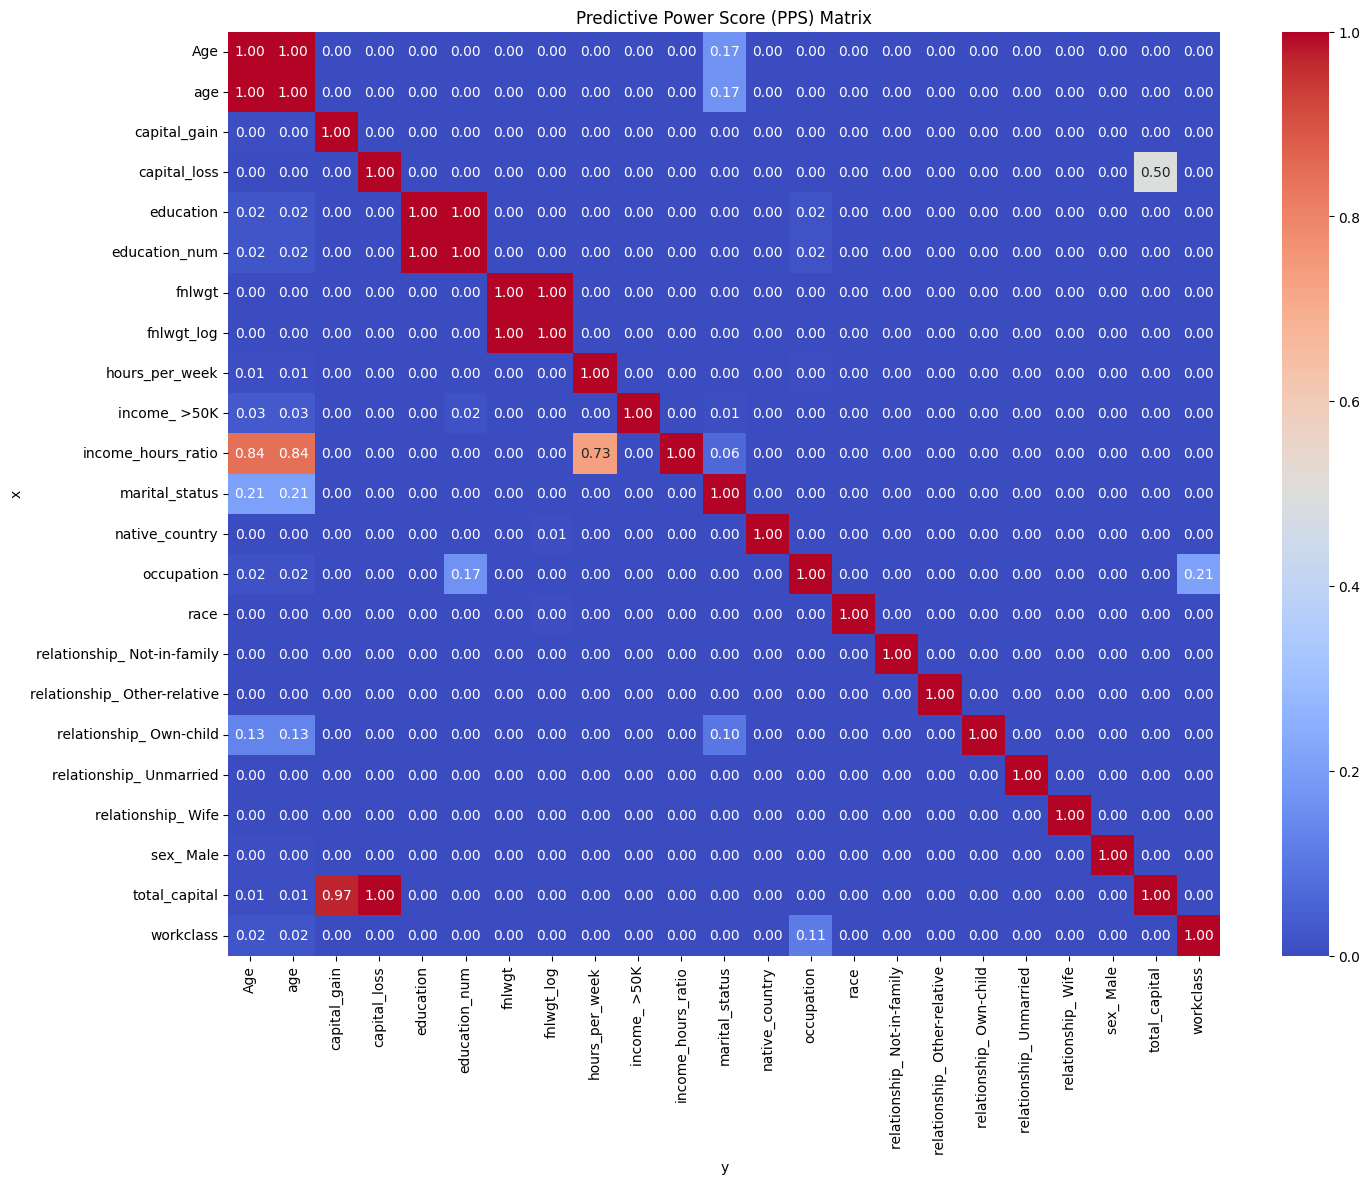

In [ ]:
# Visualize PPS matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

#### Comparing PPS with Correlation Matrix

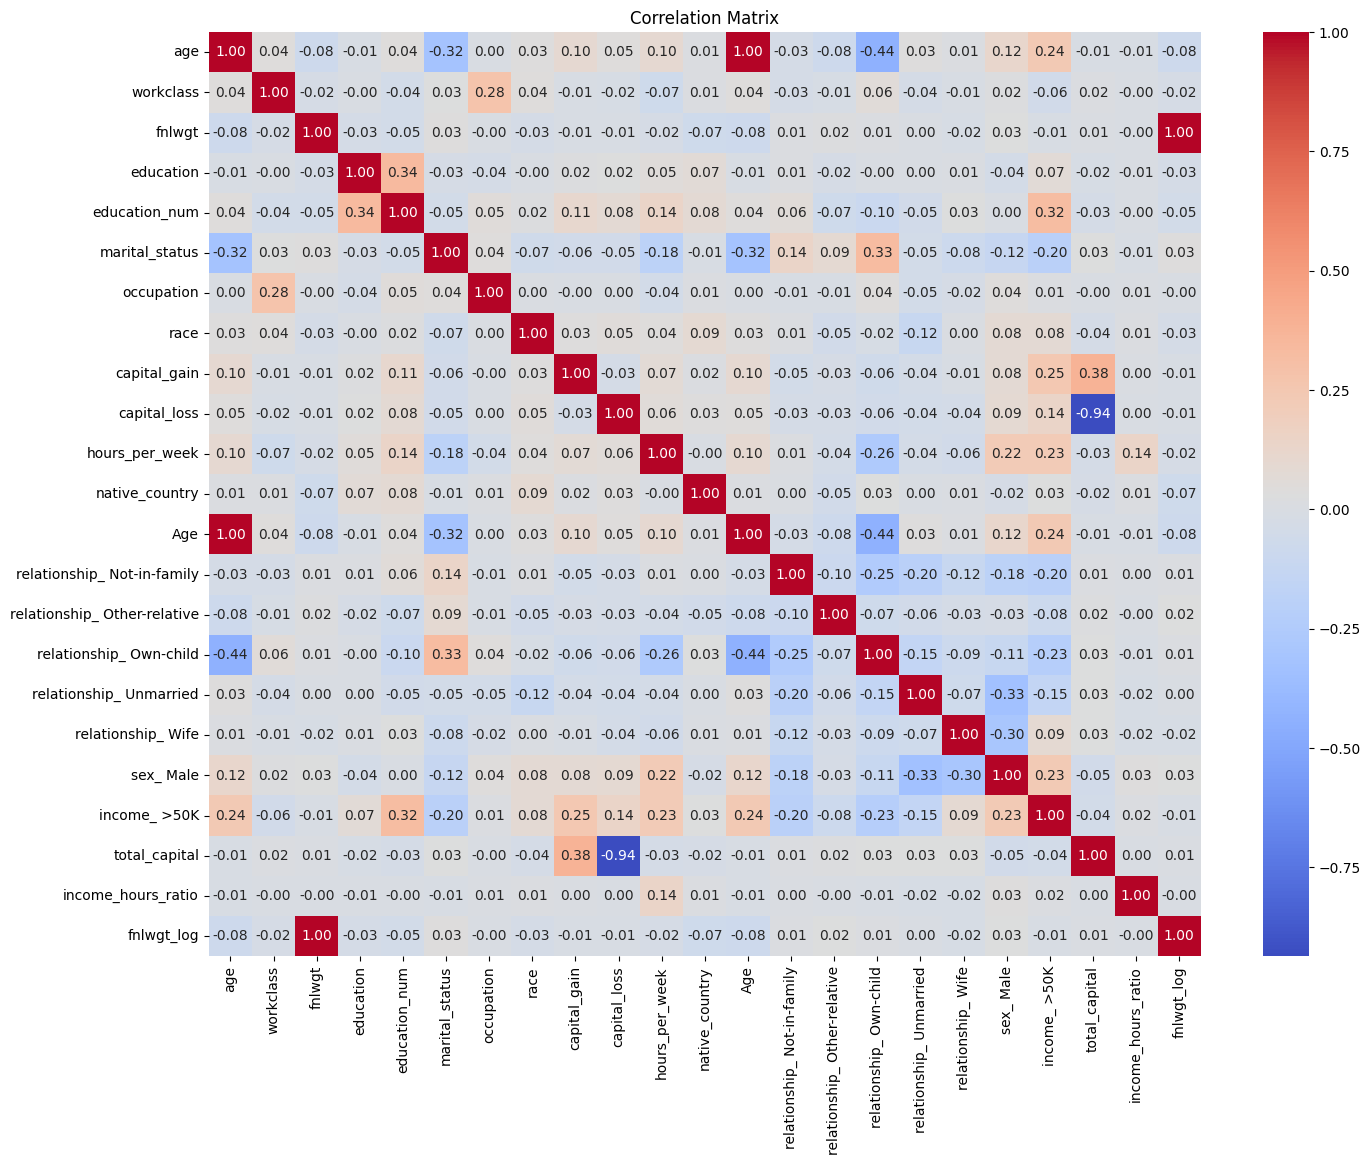

In [ ]:
corr_matrix = df_1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**Key Differences:**

**PPS:** Measures any predictive power (both linear and non-linear). Values range from 0 (no predictive power) to 1 (perfect predictive power).             
**Correlation:** Only captures linear relationships and ignores the directionality (cause-effect relationships).
